# Deep Learning – Classification (TensorFlow / Keras)

This notebook is part of the **ML-Methods** project.

It introduces **Deep Learning for supervised classification**
using **TensorFlow / Keras**, a high-level deep learning framework.

As with the other classification notebooks,
the first sections focus on data preparation
and are intentionally repeated.

This ensures consistency across models
and allows fair comparison of results.

-----------------------------------------------------

## Notebook Roadmap (standard ML-Methods)

1. Project setup and common pipeline  
2. Dataset loading  
3. Train-test split  
4. Feature scaling (why we do it)  

----------------------------------

5. What is this model? (Intuition)  
6. Model training  
7. Model behavior and key parameters  
8. Predictions  
9. Model evaluation  
10. When to use it and when not to  
11. Model persistence  
12. Mathematical formulation (deep dive)  
13. Final summary – Code only  

-----------------------------------------------------

## How this notebook should be read

This notebook is designed to be read **top to bottom**.

Before every code cell, you will find a short explanation describing:
- what we are about to do
- why this step is necessary
- how it fits into the overall process

Compared to PyTorch,
this notebook hides more low-level details,
allowing us to focus on **model structure and behavior**
rather than training mechanics.

-----------------------------------------------------

## What is Deep Learning (in this context)?

Deep Learning refers to models based on
**multi-layer neural networks**.

These models:
- learn complex, non-linear relationships
- automatically build internal representations
- improve performance as data complexity increases

In this notebook, we focus on:
**Deep Learning for tabular classification**
using fully connected neural networks.

-----------------------------------------------------

## Why TensorFlow / Keras?

TensorFlow / Keras provides:
- a high-level API for defining neural networks
- automatic training loops
- built-in loss functions and optimizers

This allows us to:
- write less code
- reduce implementation errors
- focus on architecture and results

Keras is ideal for:
- rapid prototyping
- production-ready models
- clean and readable implementations

-----------------------------------------------------

## Execution model: eager and graph

TensorFlow supports two execution modes:

- **Eager execution**  
  Operations are executed immediately,
  similar to standard Python code.

- **Graph execution**  
  Computation is compiled into a static graph
  for optimized performance.

Keras abstracts this complexity,
allowing us to work intuitively
while benefiting from optimized execution.

-----------------------------------------------------

## What you should expect from the results

With Deep Learning (TensorFlow / Keras), you should expect:

- performance comparable to PyTorch
- clean and compact model definitions
- faster experimentation
- less control over low-level training details

However:
- debugging is less explicit than PyTorch
- internal mechanics are more hidden
- understanding requires conceptual clarity

-----------------------------------------------------


___
## 1. Project setup and common pipeline

In this section we set up the common pipeline
used across classification models in this project.

Although this notebook uses **TensorFlow / Keras**,
the overall workflow remains identical
to the PyTorch and scikit-learn notebooks.

This ensures:
- conceptual continuity
- fair comparison across frameworks
- focus on what changes: the implementation


In [1]:
# ====================================
# Common imports used across classification models
# ====================================

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from pathlib import Path
import matplotlib.pyplot as plt
import joblib

# ====================================
# TensorFlow / Keras imports
# ====================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


### What changes with TensorFlow / Keras

Compared to PyTorch:
- the overall pipeline remains the same
- data preparation and evaluation stay unchanged
- the training loop is handled automatically

With Keras:
- models are defined declaratively
- training is performed via `.fit()`
- gradients and updates are hidden

This reduces code complexity
but also hides some internal mechanics.

In the next section,
we will load the dataset
and prepare it for TensorFlow training.


___
## 2. Dataset loading

In this section we load the dataset
used for the Deep Learning classification task.

We intentionally use the **same dataset**
adopted in all previous classification notebooks.

This allows:
- direct comparison across frameworks
- isolation of implementation differences
- consistent evaluation of model behavior


In [2]:
# ====================================
# Dataset loading
# ====================================

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


### What we have after this step

- `X` contains the input features
- `y` contains the target labels

This is a **binary classification problem**.

At this stage:
- data is still in pandas / NumPy format
- this is intentional for consistency
- conversion to TensorFlow tensors will happen later

In the next section,
we will split the dataset
into training and test sets.


___
## 3. Train-test split

In this section we split the dataset
into training and test sets.

This step allows us to evaluate
how well the neural network generalizes
to unseen data.


In [3]:
# ====================================
# Train-test split
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


### What we have after this step

After splitting the data:
- the training set is used to learn model parameters
- the test set is kept completely unseen
- evaluation reflects real-world performance

An 80 / 20 split is a common and balanced choice
for medium-sized datasets.

In the next section,
we will apply **feature scaling**.

As with all Deep Learning models,
this step is **mandatory** for stable training.


___
## 4. Feature scaling (why we do it)

In this section we apply feature scaling
to the input data.

For Deep Learning models,
feature scaling is **mandatory**.

Neural networks are trained using gradient-based optimization,
which is highly sensitive to the scale of input features.


In [4]:
# ====================================
# Feature scaling
# ====================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Why we use standardization here

We use **standardization** for feature scaling
because neural networks rely on gradients
to update their parameters.

Standardization:
- centers features around zero
- ensures comparable variance across features
- improves numerical stability during training

This helps:
- gradients behave more predictably
- optimization converge faster
- training remain stable across layers

At this stage:
- data is numerically ready
- still in NumPy format

In the next section,
we will explain **what this model is**
and how a neural network performs classification
using TensorFlow / Keras.


___
## 5. What is this model? (Deep Learning with TensorFlow / Keras)

Before writing any TensorFlow / Keras code,
it is important to clearly understand
**what this model is doing** and **what problem it is solving**.

Even if Keras hides many low-level details,
the underlying mechanism is the same
as the PyTorch model.


### What do we want to achieve?

We want to build a model that:
- receives a vector of numerical features
- processes them through multiple transformations
- outputs a prediction for a class label

Each input sample represents a single object
described by multiple measurements.

The model’s task is to learn
how combinations of these measurements
correspond to different classes.


### How does a neural network solve this problem?

A neural network solves classification by:

1. Taking the input feature vector  
2. Applying a sequence of linear transformations  
3. Introducing non-linear decisions between steps  
4. Producing scores for each possible class  

Each transformation slightly reshapes the data
into a form that is easier to separate.


### What happens inside the model?

Inside the model:
- features are combined using weights
- biases shift decision thresholds
- activation functions decide which signals matter

Each layer answers a simple question:
> “Is this pattern present in the input?”

By stacking layers:
- simple patterns are detected first
- more complex patterns are built on top of them
- the final layer focuses on class separation


### Why multiple layers?

A single layer can only separate data
using simple decision boundaries.

Multiple layers allow the model to:
- learn hierarchical representations
- combine features in non-trivial ways
- approximate complex, non-linear boundaries

Depth gives the model expressive power.


### What does Keras abstract away?

TensorFlow / Keras handles automatically:
- the forward pass
- the loss computation
- gradient calculation
- parameter updates

This allows us to:
- focus on model structure
- reduce boilerplate code
- avoid implementation errors


### How learning happens conceptually

Learning follows the same cycle:

1. The model makes a prediction  
2. The prediction is compared to the true label  
3. An error value is computed  
4. The model parameters are adjusted  
5. The process repeats  

Each iteration reduces the model’s mistakes.

The difference is not *what* happens,
but *how much of it we write ourselves*.


### Key takeaway

A TensorFlow / Keras classifier:
- performs the same operations as a PyTorch model
- but abstracts away the training mechanics
- allowing faster and cleaner implementation

Understanding the PyTorch version
makes it much easier to reason about
what Keras is doing internally.

In the next section,
we will define and train the model
using the Keras high-level API.


___
## 6. Model training (TensorFlow / Keras)

In this section we define and train
a neural network classifier using TensorFlow / Keras.

Compared to PyTorch:
- the model is defined declaratively
- the training loop is handled automatically
- loss computation and parameter updates are abstracted away

Conceptually, however,
the learning process is identical.


In [5]:
# ====================================
# Model definition (Keras)
# ====================================

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(2)  # logits for 2 classes
])


In [6]:
# ====================================
# Model compilation
# ====================================

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


In [7]:
# ====================================
# Model training
# ====================================

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=0
)


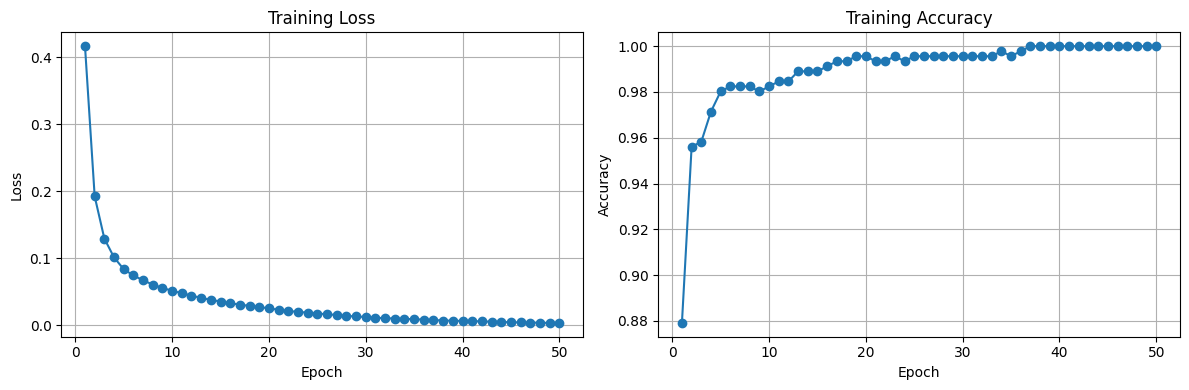

In [8]:
# ====================================
# Training history visualization
# ====================================

history_dict = history.history

epochs = range(1, len(history_dict["loss"]) + 1)

plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict["loss"], marker="o")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict["accuracy"], marker="o")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


### What we just did (step by step)

#### 1. Defining the model structure

We defined the neural network using `keras.Sequential`.

This means:
- layers are applied in order
- data flows from input to output step by step

The model architecture is:

- input layer → number of features
- hidden layer → 64 neurons + ReLU
- hidden layer → 32 neurons + ReLU
- output layer → 2 neurons (one per class)


#### 2. Why the output layer has 2 neurons

The final layer outputs **2 values**:
- one score for class 0
- one score for class 1

These values are **logits**,
not probabilities.

Keras does not apply softmax here,
because the loss function
will handle it internally.


#### 3. Compiling the model

Calling `compile` tells Keras:

- how to update the model (optimizer)
- how to measure error (loss)
- which metrics to track

This step replaces:
- manual loss definition
- manual optimizer setup
- manual training loop


#### 4. Loss function choice

We use `SparseCategoricalCrossentropy`
because:
- labels are integers (0 or 1)
- the problem is classification
- `from_logits=True` tells Keras
  that the model outputs raw scores

This is conceptually identical
to `CrossEntropyLoss` in PyTorch.


#### 5. Training with `.fit()`

Calling `model.fit()` performs:

1. Forward pass  
2. Loss computation  
3. Gradient calculation  
4. Parameter update  

All of this happens internally.

Each epoch corresponds to
one full pass over the training data.

The history object stores:
- loss values
- accuracy values
over all epochs.


### Key takeaway

TensorFlow / Keras:
- performs the same learning steps as PyTorch
- but hides the training mechanics
- allowing concise and readable code

Understanding the PyTorch version
makes it clear what Keras
is doing behind the scenes.

In the next section,
we will analyze **model behavior**
and the most important parameters
that influence learning.


___
## 7. Model behavior and key parameters

In this section we analyze how the TensorFlow / Keras
neural network behaves during training
and which parameters most strongly influence its performance.

Unlike classical machine learning models,
the behavior of a neural network
emerges from several interacting components.


### Model capacity and architecture

The architecture defines the **capacity** of the model.

In this notebook, the model has:
- two hidden layers
- 64 neurons in the first layer
- 32 neurons in the second layer

This gives the model enough capacity
to learn complex, non-linear patterns.

However:
- higher capacity increases the risk of overfitting
- small datasets are especially sensitive


### Depth and non-linearity

Each hidden layer applies:
- a linear transformation
- followed by a non-linear activation (ReLU)

Depth allows the model to:
- build intermediate representations
- combine features progressively
- form complex decision boundaries

Without non-linearity:
- the model would collapse to a linear classifier
- adding layers would provide no benefit


### Training dynamics observed in practice

From the training curves, we observe that:
- loss decreases rapidly
- accuracy approaches 1.0
- improvements slow down over time

This behavior indicates that:
- the model is fitting the training data very well
- additional epochs mostly refine memorization


### Overfitting behavior

The model shows signs of overfitting because:
- training accuracy becomes extremely high
- training loss approaches zero
- the dataset is relatively small

This is expected behavior
for deep learning models on tabular data
with limited samples.

Overfitting is not an implementation error,
but a consequence of model expressiveness.


### Role of training parameters

Several parameters influence training behavior:

- **Number of epochs**  
  More epochs allow the model to fit more precisely,
  increasing overfitting risk.

- **Learning rate**  
  Controls how aggressively parameters are updated.
  Too high → unstable training.
  Too low → slow convergence.

- **Batch size**  
  Influences gradient noise and convergence smoothness.

These parameters affect *how* the model learns,
not *what* it can learn.


### Key takeaway

The behavior of a Keras neural network
is determined by:
- model architecture
- non-linearity
- training duration
- optimization parameters

Deep learning models are powerful
but require careful control
to balance learning and generalization.

In the next section,
we will use the trained model
to generate predictions on unseen data.


_____
## 8. Predictions

In this section we use the trained TensorFlow / Keras model
to generate predictions on unseen test data.

As with other classification models,
it is important to distinguish between:
- raw model outputs
- predicted class labels
- predicted class probabilities


In [9]:
# ====================================
# Predictions with TensorFlow / Keras
# ====================================

# Raw model outputs (logits)
logits = model.predict(X_test_scaled)

# Predicted class labels (0 or 1)
y_pred = np.argmax(logits, axis=1)

# Convert logits to probabilities using softmax
y_pred_proba = tf.nn.softmax(logits, axis=1).numpy()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


### What the model outputs

The Keras model outputs **logits**:
- raw numerical scores
- one value per class
- not normalized

These values represent
how strongly the model favors each class.

### From logits to class labels

To obtain predicted class labels:
- we select the index of the largest logit
- this corresponds to the most likely class

This is done using `argmax`.

### From logits to probabilities

To obtain probabilities:
- we apply the softmax function
- values are normalized to sum to 1

Probabilities are useful for:
- interpreting model confidence
- analyzing uncertain predictions
- setting custom decision thresholds

### Important consistency note

During training:
- the loss function internally applies softmax
- logits are passed directly to the loss

During prediction:
- we explicitly apply softmax
- because we want interpretable probabilities

At this point, we have:
- predicted class labels
- predicted class probabilities

In the next section,
we will evaluate these predictions
using standard classification metrics.


___
## 9. Model evaluation

In this section we evaluate the performance
of the trained TensorFlow / Keras model
on unseen test data.

Evaluation focuses on:
- overall performance
- error distribution
- comparison with other classification models


In [10]:
# ====================================
# Accuracy
# ====================================

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9736842105263158

In [11]:
# ====================================
# Confusion matrix
# ====================================

cm = confusion_matrix(y_test, y_pred)
cm


array([[41,  2],
       [ 1, 70]])

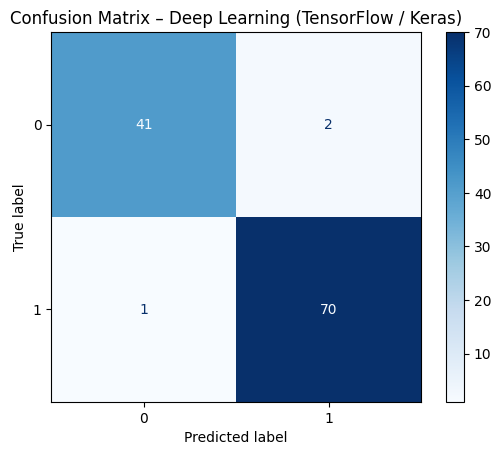

In [12]:
# ====================================
# Confusion matrix visualization
# ====================================

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Deep Learning (TensorFlow / Keras)")
plt.show()


In [13]:
# ====================================
# Classification report
# ====================================

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### How to interpret these results

**Accuracy** provides a global measure
of how many samples were classified correctly.

However, accuracy alone
does not reveal the full error structure.

### Confusion matrix

The confusion matrix shows:
- correct predictions
- false positives
- false negatives

It allows us to understand
which types of errors the model makes.

This is especially important
in binary classification problems.

### Classification report

The classification report summarizes:
- precision
- recall
- F1-score
- support for each class

These metrics provide a more nuanced view
than accuracy alone.

### Framework independence

At this stage:
- evaluation is identical across frameworks
- results can be compared directly
- differences come from the model, not the tools

Once predictions are available,
model evaluation becomes framework-agnostic.

### Key takeaway

TensorFlow / Keras models integrate seamlessly
with standard evaluation tools.

This allows consistent benchmarking
across scikit-learn, PyTorch, and TensorFlow.


___
## 10. When to use it and when not to

Deep Learning with TensorFlow / Keras
is a powerful and widely used approach,
but it is not always the best choice.

Choosing this model depends on:
- data characteristics
- problem complexity
- development constraints


### When to use TensorFlow / Keras

TensorFlow / Keras is a good choice when:

- the problem involves complex, non-linear patterns
- deep models are expected to outperform classical ones
- rapid experimentation is important
- clean and concise model definitions are preferred
- production deployment is a consideration

It is commonly used for:
- research prototyping
- industrial applications
- scalable deep learning systems


### When NOT to use TensorFlow / Keras

TensorFlow / Keras may not be ideal when:

- a simpler model performs equally well
- interpretability is a primary requirement
- the dataset is small and limited
- fine-grained control over training is needed

In such cases,
classical ML models or PyTorch
may be more appropriate.


### Practical warning signs

You should reconsider using Keras if:

- training accuracy becomes perfect very quickly
- validation performance stagnates or degrades
- model complexity grows unnecessarily
- simpler alternatives are easier to maintain

Model choice should always balance
performance, complexity, and clarity.


### Key takeaway

TensorFlow / Keras provides:
- a high-level, production-ready API
- fast development cycles
- reliable default behaviors

It is an excellent choice
when speed and simplicity matter,
but understanding its abstractions
is essential for effective use.

In the next section,
we will save the trained model
and complete the pipeline.


___
## 11. Model persistence

In this section we save the trained TensorFlow / Keras model
and the preprocessing steps used during training.

Model persistence allows us to:
- reuse the model without retraining
- ensure reproducibility
- separate training from inference


In [ ]:
# ====================================
# Model persistence (TensorFlow / Keras)
# ====================================

# Define model directory
model_dir = Path("models/supervised_learning/classification/deep_learning_tensorflow")

# Create directory if it does not exist
model_dir.mkdir(parents=True, exist_ok=True)

# Save the trained Keras model
model.save(model_dir / "tensorflow_keras_model")

# Save the scaler (part of the preprocessing pipeline)
joblib.dump(scaler, model_dir / "scaler.joblib")


### What exactly we saved

For TensorFlow / Keras models, we save:
- the full model architecture
- trained weights
- optimizer configuration

This is handled automatically by `model.save()`.

The saved model can be:
- loaded without redefining the architecture
- used immediately for inference
- deployed in production environments


### Why we also save the scaler

Neural networks are highly sensitive
to the scale of input features.

The scaler is therefore:
- an essential part of the pipeline
- required to preprocess new data correctly

Saving the scaler ensures that
future inputs are transformed
in exactly the same way as during training.


### How the model will be reused

To reuse the model later:
1. load the scaler
2. apply preprocessing to new data
3. load the saved Keras model
4. generate predictions

This guarantees consistency
between training and inference.

At this point,
the TensorFlow / Keras classification model
is fully trained, evaluated, and saved.


___
## 12. Mathematical formulation (deep dive)

This section provides a mathematical interpretation
of the TensorFlow / Keras neural network used
for supervised classification.

Although Keras abstracts the training mechanics,
the underlying mathematical operations
are identical to those seen in PyTorch.


### Representation of the data

Each input sample is represented as a vector:

$$
x_i \in \mathbb{R}^d
$$

where:
- \( d \) is the number of input features
- each sample corresponds to one observation

The corresponding label is:

$$
y_i \in \{0, 1\}
$$

The supervised dataset is:

$$
\{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}
$$


### Linear layers in Keras

Each Dense layer applies a linear transformation:

$$
z = W x + b
$$

where:
- \( x \) is the input vector
- \( W \) is the weight matrix
- \( b \) is the bias vector
- \( z \) is the pre-activation output

In Keras, this operation is implemented
by `layers.Dense`.


### Non-linear activation

After each linear transformation,
a non-linear activation function is applied:

$$
a = \phi(z)
$$

In this model, the activation function is ReLU:

$$
\phi(z) = \max(0, z)
$$

Non-linearity allows the network
to model complex, non-linear relationships.


### Layer composition

By stacking multiple layers,
the network applies a sequence of transformations:

$$
x \rightarrow h_1 \rightarrow h_2 \rightarrow \hat{y}
$$

Each hidden layer learns
a higher-level representation
of the input data.


### Output layer and logits

The final Dense layer produces **logits**:

$$
\hat{y} = f(x)
$$

Each component of $$ \hat{y} $$
corresponds to one class.

These values are raw scores
and do not represent probabilities.


### Softmax and class probabilities

Class probabilities are obtained
by applying the softmax function:

$$
P(y = c \mid x) =
\frac{e^{\hat{y}_c}}{\sum_k e^{\hat{y}_k}}
$$

Softmax converts logits
into a probability distribution
over the possible classes.


### Loss function

Training requires measuring prediction error.

This is done using a loss function:

$$
\mathcal{L}(y, \hat{y})
$$

For classification,
the loss penalizes incorrect predictions
and low confidence in correct predictions.

In Keras, this is handled by
categorical cross-entropy.


### Gradient-based optimization

Model parameters are updated
using gradient-based optimization:

$$
W \leftarrow W - \eta \nabla_W \mathcal{L}
$$

where:
- \( \eta \) is the learning rate
- gradients indicate how parameters should change

TensorFlow computes gradients
and applies updates automatically.


### Learning perspective

From a learning perspective:
- the model starts with random parameters
- predictions are initially inaccurate
- each training step reduces the error

Learning is an iterative process
that gradually improves model performance.


### Final takeaway

The TensorFlow / Keras classifier:
- applies linear and non-linear transformations
- produces logits for classification
- learns by minimizing a loss function
- updates parameters using gradient descent

The mathematical structure
is identical to PyTorch,
with differences only in implementation abstraction.


___
## 13. Final summary – Code only

The following cell contains the complete classification pipeline
from data loading to model persistence.

No explanations are provided here on purpose.

This section is intended for:
- quick execution
- reference
- reuse in scripts or applications


In [ ]:
# ====================================
# Imports
# ====================================

import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

from pathlib import Path
import matplotlib.pyplot as plt
import joblib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# ====================================
# Dataset loading
# ====================================

data = load_breast_cancer(as_frame=True)

X = data.data
y = data.target


# ====================================
# Train-test split
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


# ====================================
# Feature scaling
# ====================================

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ====================================
# Model definition (Keras)
# ====================================

model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(2)  # logits for 2 classes
])


# ====================================
# Model compilation
# ====================================

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)


# ====================================
# Model training
# ====================================

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    verbose=0
)


# ====================================
# Training history visualization
# ====================================

history_dict = history.history
epochs = range(1, len(history_dict["loss"]) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict["loss"], marker="o")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict["accuracy"], marker="o")
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)

plt.tight_layout()
plt.show()


# ====================================
# Predictions
# ====================================

logits = model.predict(X_test_scaled)
y_pred = np.argmax(logits, axis=1)
y_pred_proba = tf.nn.softmax(logits, axis=1).numpy()


# ====================================
# Model evaluation
# ====================================

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

accuracy
cm

print(classification_report(y_test, y_pred))


# ====================================
# Confusion matrix visualization
# ====================================

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=[0, 1]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Deep Learning (TensorFlow / Keras)")
plt.show()


# ====================================
# Model persistence
# ====================================

model_dir = Path("models/supervised_learning/classification/deep_learning_tensorflow")
model_dir.mkdir(parents=True, exist_ok=True)

model.save(model_dir / "tensorflow_keras_model")
joblib.dump(scaler, model_dir / "scaler.joblib")
